# ML Project 


The dataset is about the house price in King County in Washington state. I am going to use python to explore, analyze and visualize the data the get business insights of the house price for the realtors, developers and investors. I am going to generate regression model to predict the house price. 

Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

Description of Variables:


date:	date sold \
price:	sale price<font color="red"> TARGET FEATURE </font> \
bedrooms:	number of bedrooms \
bathrooms:	number of bathrooms \
sqft__living:	size of living area in square feet \
sqft_lot:	size of the lot in square feet \
floors:	number of floors \
waterfront:	‘1’ if the property has a waterfront, ‘0’ if not. \
view:	An index from 0 to 4 of how good the view of the property was \
condition:	condition of the house, ranked from 1 to 5 \
grade:	Classification by construction quality which refers to the types of materials used and the quality of workmanship.             Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. \
Sqft_above:	square feet above ground \
sqft_basement:	square feet below ground \
yr_built:	year built \n
yr_renovated: year renovated. ‘0’ if never renovated \
zipcode:	5 digit zip code \
Lat, long: latitude and longitude \
sqft_living15:	average size of closest 15 houses, in square feet \
sqft_lot15:	average size of the closest 15 houses’ lots, in square feet 

# Data Cleansing and Data Preparation

1. Import packages
2. Testing null value
3. Conduct some data engineering

In [2]:

# import Matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as dts
import matplotlib as mpl
%matplotlib inline

# import Seaborn
import seaborn as sns

# import pandas
import pandas as pd

# import statsmodel.api
import statsmodels.api as sm

# import numoy
import numpy as np

# Load dataset and descrive summary of statistics.
data=pd.read_csv('kc_house_data.csv')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Testing if any null values
print(data.isnull().sum())
data.isnull().values.any()

# Conclusion: No null values found

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


False

In [4]:
# Conduct some data engineering, whihc will make more business sense. 
# Adjust formats for some variables.
# ID column and Date column can be removed since it does not have significant impact on the Price.There is only one year timeframe.
# Year_built column can be converted to the varable 'Age of the house', which makes more business sense and easier to analyze the dataset. 

# Training Data
data['date'] = pd.to_datetime(data['date'])
data['house_age'] = data['date'].dt.year - data['yr_built']
data['yr_since_renovation'] = data['date'].dt.year - data['yr_renovated']
data.drop(columns=['id', 'yr_built', 'yr_renovated', 'date'], axis=1, inplace=True)
for column in data.columns:
  data[column] = data[column].astype(float)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21613 non-null  float64
 1   bedrooms             21613 non-null  float64
 2   bathrooms            21613 non-null  float64
 3   sqft_living          21613 non-null  float64
 4   sqft_lot             21613 non-null  float64
 5   floors               21613 non-null  float64
 6   waterfront           21613 non-null  float64
 7   view                 21613 non-null  float64
 8   condition            21613 non-null  float64
 9   grade                21613 non-null  float64
 10  sqft_above           21613 non-null  float64
 11  sqft_basement        21613 non-null  float64
 12  zipcode              21613 non-null  float64
 13  lat                  21613 non-null  float64
 14  long                 21613 non-null  float64
 15  sqft_living15        21613 non-null 

# Part 1: Descriptive Statistics

### Step 1: Create a scatterplot of Longitude, Latitude and Price.



<AxesSubplot:xlabel='long', ylabel='lat'>

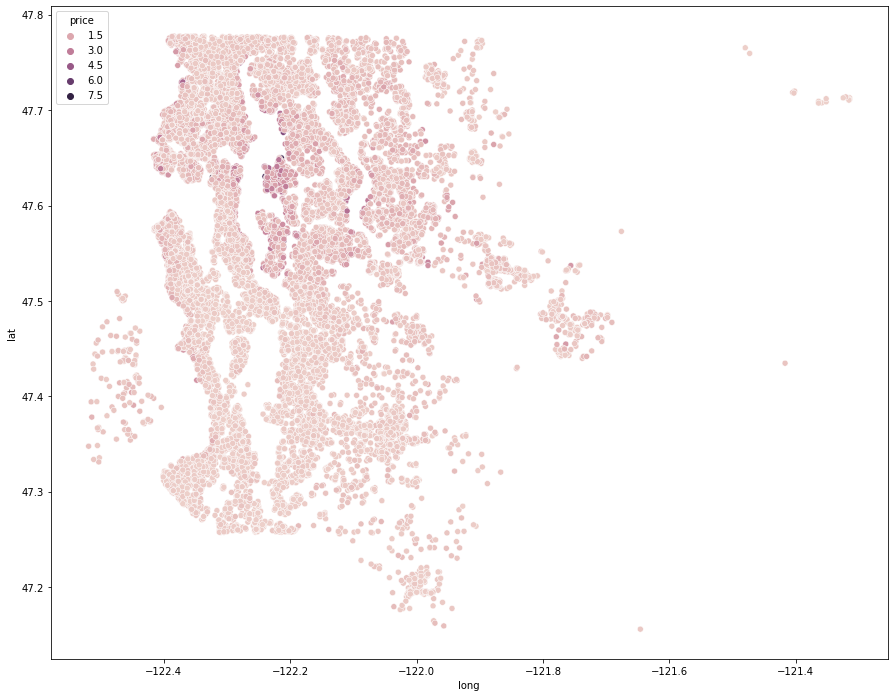

In [5]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='long',y='lat',data=data,hue='price')

#### Conclusion: City Bellevue has higher house price than other cities in King County if we use this map distribution comparing to google map. The west of Bellevue which close to the Lake Washington has the highest average house price.

### Step 2: Create a barchart of Price and zipcode.


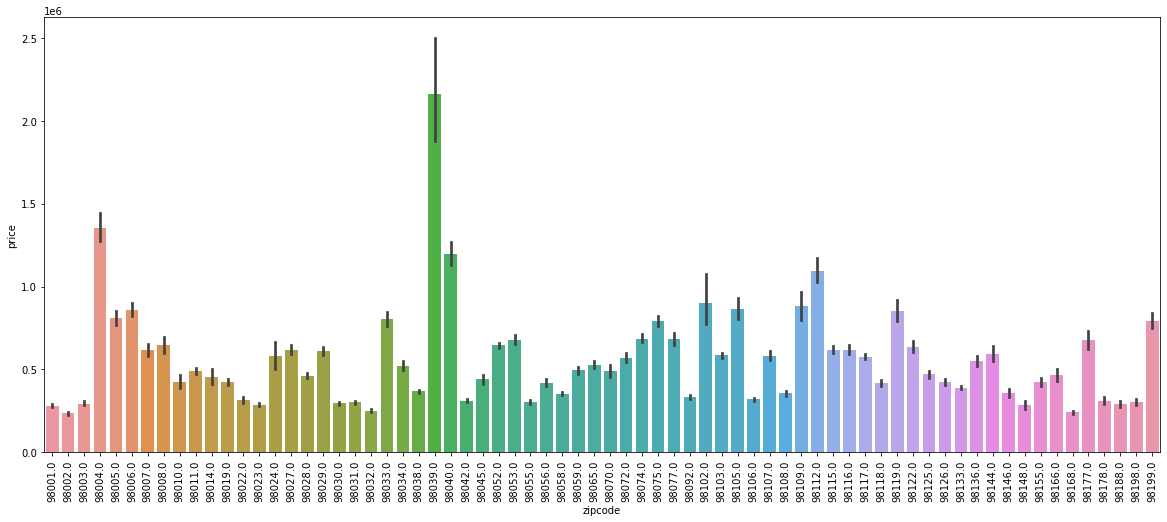

In [6]:
plt.figure(figsize=(20,8))
sns.barplot(x="zipcode", y="price", data=data)
plt.xticks(rotation=90)
print()

#### Conclusion: Zipcode 96039 has the average highest price in King County. Zipcode 96004, 96040 and 96112 are also leading the house price in King County.

### <font color='red'>Insights: 
Based on the price, zipcode, longitude and latitude, we can build three sales teams that focus on different markets. Team 1 should focus on wealthy clients sell the houses located in the zipcode 96004, 96040 96112. Team 2 should focus in new home buyers who are not able to afford the high house price. The targeted house for them locates in the zipcode 96001, 96002, 96003, 96030, 96031.96032,96148 and 96168. Team 3 focus on other clients and the target houses could locates in any area in King County. </font>


### Step 3: Create a histogram of Price and a boxplot.


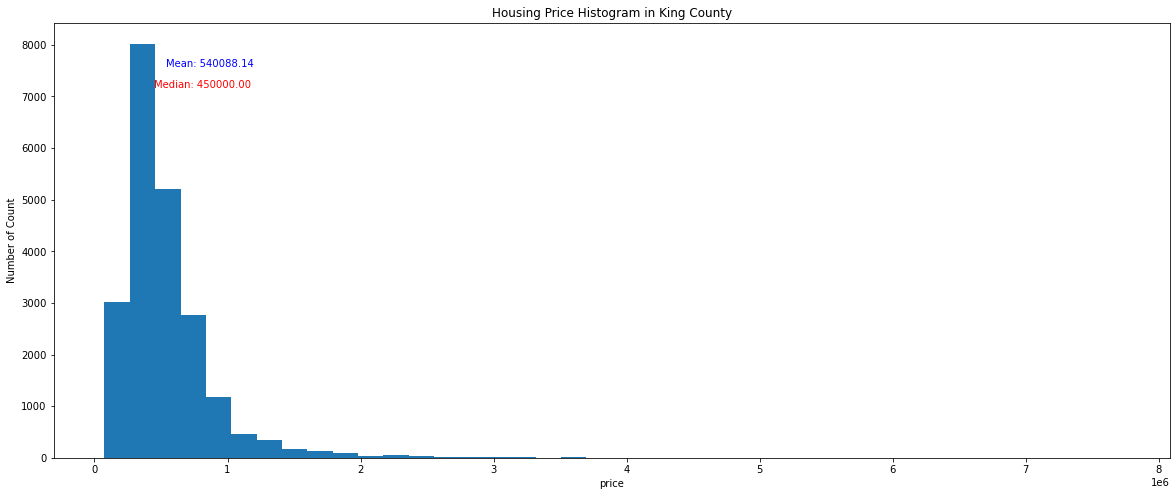

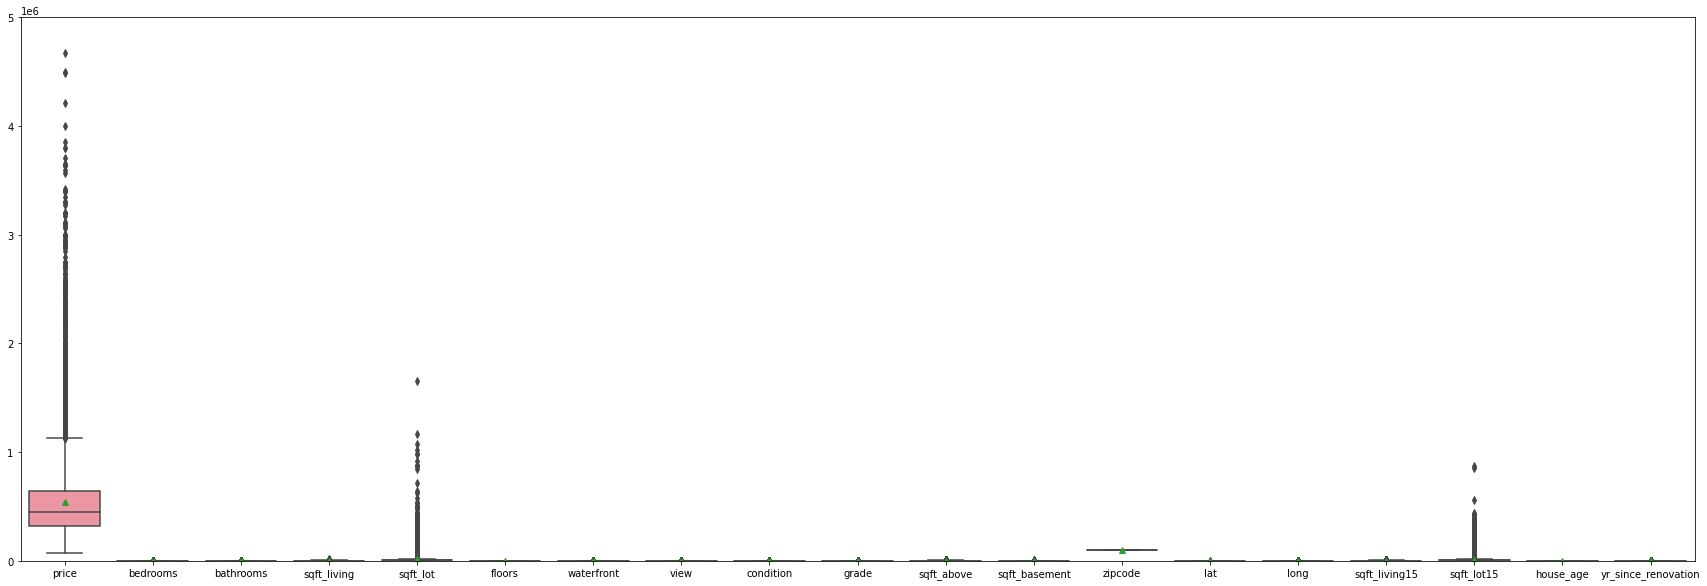

In [7]:
# Create a histogram of Price

plt.figure(figsize=(20,8))

_ = plt.hist(data['price'], bins=40)

_ = plt.xlabel('price')

_ = plt.ylabel('Number of Count')

min_ylim, max_ylim = plt.ylim()
plt.text(data['price'].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(data['price'].mean()), color='blue')
plt.text(data['price'].median(), max_ylim*0.85, 'Median: {:.2f}'.format(data['price'].median()), color='red')

_ = plt.title('Housing Price Histogram in King County')

# Generate boxplot by all variables except for ID and Data since they are not significant.

dff=data

f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(data=dff, showmeans=True)
fig.axis(ymin=0, ymax=5000000);

plt.show()

#### Conclusion: Based on the histogram of Price, we know the mean price is 540,182, and the median price is 450,000.  Some property have been sold for a price far higher than typical for King County. Based on the box-plot, Price has a lot of outliers.

### <font color='red'>Insights: 
Since the mean of the price is higher than the median, it means there are half of the houses inventory in the country which price are lower than $450,000. It is a good selling point for our sales team to look for investor and first home buyer who do not have high budget. </font>

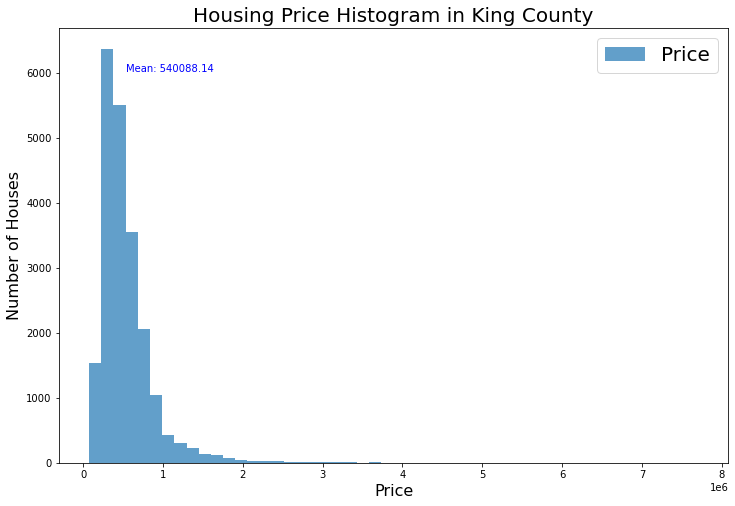

In [8]:
# Create a histogram of Price



plt.figure(figsize=(12,8))

_ = plt.hist(data['price'], bins=50, alpha=0.7, label = 'Price',)

_ = plt.xlabel('Price', fontsize=16)

_ = plt.ylabel('Number of Houses',fontsize=16)

min_ylim, max_ylim = plt.ylim()
plt.text(data['price'].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(data['price'].mean()), color='blue')

_= plt.legend(loc='upper right', prop={'size':20})



_= plt.title('Housing Price Histogram in King County', fontsize=20)
plt.show()


#### Conclusion:  There are 14953 entries for the outliers comparing to the 21613 total dataset entries. If we remove the outliers with higher percentage of the dataset, the mean of Price will be lower and the shape of the graph will change a lot. It is good to not remove outliers for this dataset to visualize the data and predict the price.

### <font color='red'>Insights: 
Since the percentage of outliers are high. it may be not a good idead to create a regression model without outliners. </font>

### Step 5: Plot the relationship between Price and variables in one chart.

/opt/homebrew/Caskroom/miniforge/base/envs/dev_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

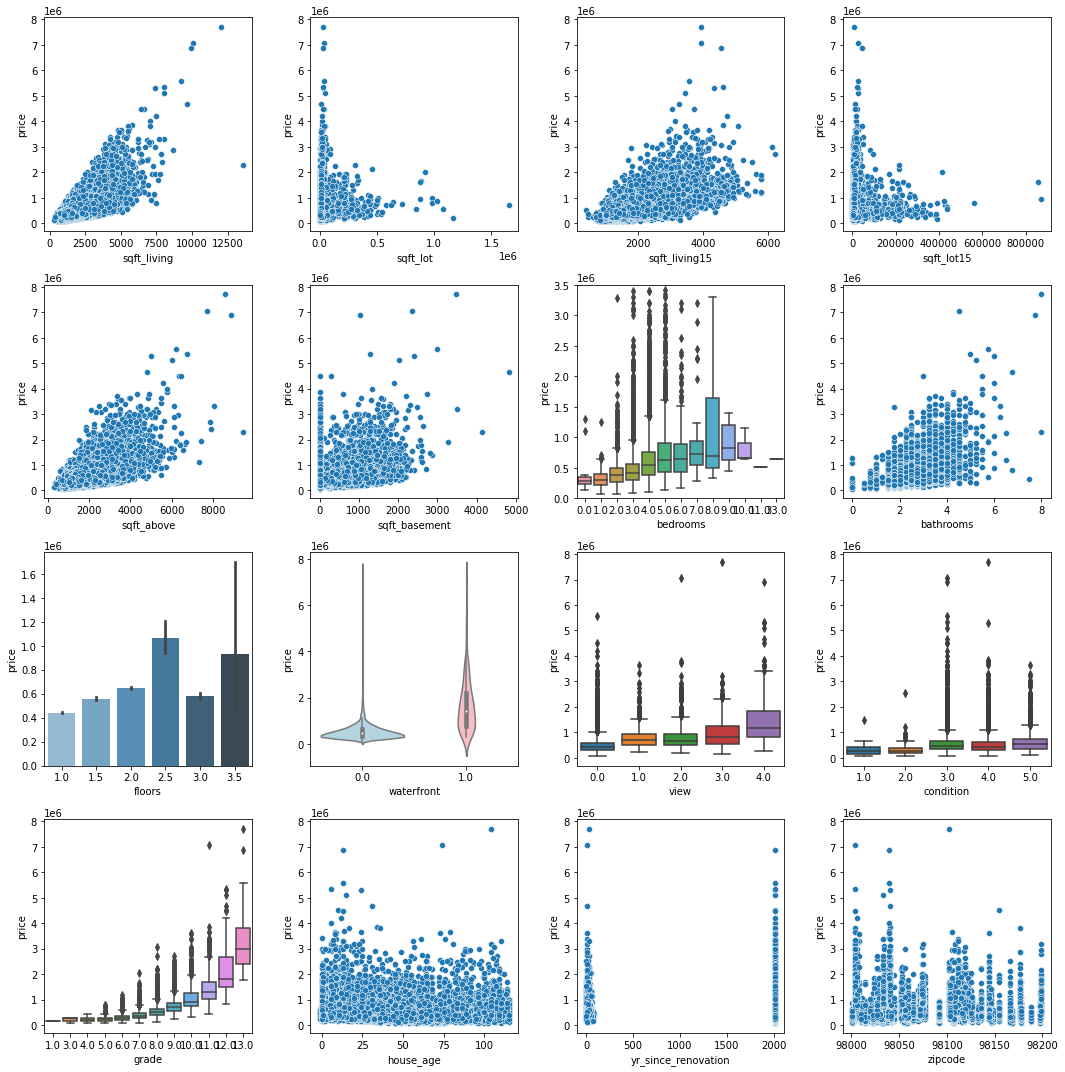

In [9]:
##Step two-- plot the relationship between price and variables


plt.figure(figsize=(15,15))


plt.title('relationship between price and variables')

plt.subplot(4,4,1)
sns.scatterplot(y='price',x='sqft_living',data=data);

plt.subplot(4,4,2)
sns.scatterplot(y='price',x='sqft_lot',data=data);

plt.subplot(4,4,3)
sns.scatterplot(y='price',x='sqft_living15',data=data);

plt.subplot(4,4,4)
sns.scatterplot(y='price',x='sqft_lot15',data=data);


plt.subplot(4,4,5)
sns.scatterplot(y='price',x='sqft_above',data=data);

plt.subplot(4,4,6)
sns.scatterplot(y='price',x='sqft_basement',data=data);

plt.subplot(4,4,7)
fig = sns.boxplot(x='bedrooms', y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

plt.subplot(4,4,8)
sns.scatterplot(y='price',x='bathrooms',data=data);


plt.subplot(4,4,9)
sns.barplot(x="floors",y="price",data=data,palette="Blues_d");

plt.subplot(4,4,10)
sns.violinplot("waterfront", "price", data=data, palette=["lightblue", "lightpink"]);

plt.subplot(4,4,11)
fig = sns.boxplot(x='view', y="price", data=data);


plt.subplot(4,4,12)
sns.boxplot(x='condition', y="price", data=data)

plt.subplot(4,4,13)

sns.boxplot(x='grade', y="price", data=data);

plt.subplot(4,4,14)
sns.scatterplot(y='price', x='house_age',data=data);


plt.subplot(4,4,15)
sns.scatterplot(y='price',x='yr_since_renovation',data=data);

plt.subplot(4,4,16)
sns.scatterplot(y='price',x='zipcode',data=data);


plt.tight_layout()
plt.plot()




#### Conclusion:  
1. Looks like the price is positive related to square feet of living room, square feet above ground and average size of closest 15 houses in square feet, condition and grade and the level of view, bedroom and bathroom.
2. The houses with waterfront have higher average price than the ones without waterfront. But the gap is not too much.
3. Price does not obviously related to size of the lot in square feet, square feet below ground and average size of the closest 15 houses’ lots, in square feet, house age, year renovated.
4. The house with 2 floors have average higher price than the houses with 1 or 3 floors.

### <font color='red'>Insights: 
Realtor can better help client analyze that the price based on the square feet of living room, square feet above ground and average size of closest 15 houses in square feet, condition and grade and the level of view, bedroom and bathroom and floors.If those variables have high value, it is good to convince the client to invest since the increasing price is highly related to those factors.   </font>

# Part 2: Data PreProcessing

### Step 6: Data Standardization & Data Normalization.

In [10]:
from sklearn.preprocessing import MinMaxScaler

print(data.columns)

scaler = MinMaxScaler().fit(data.values)
transform = scaler.transform(data.values)
data[data.columns] = transform

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age', 'yr_since_renovation'],
      dtype='object')


# Part 3: Inferential Statistical Analysis

### Step 7: Create Heatmap and Barplot to show correlations.

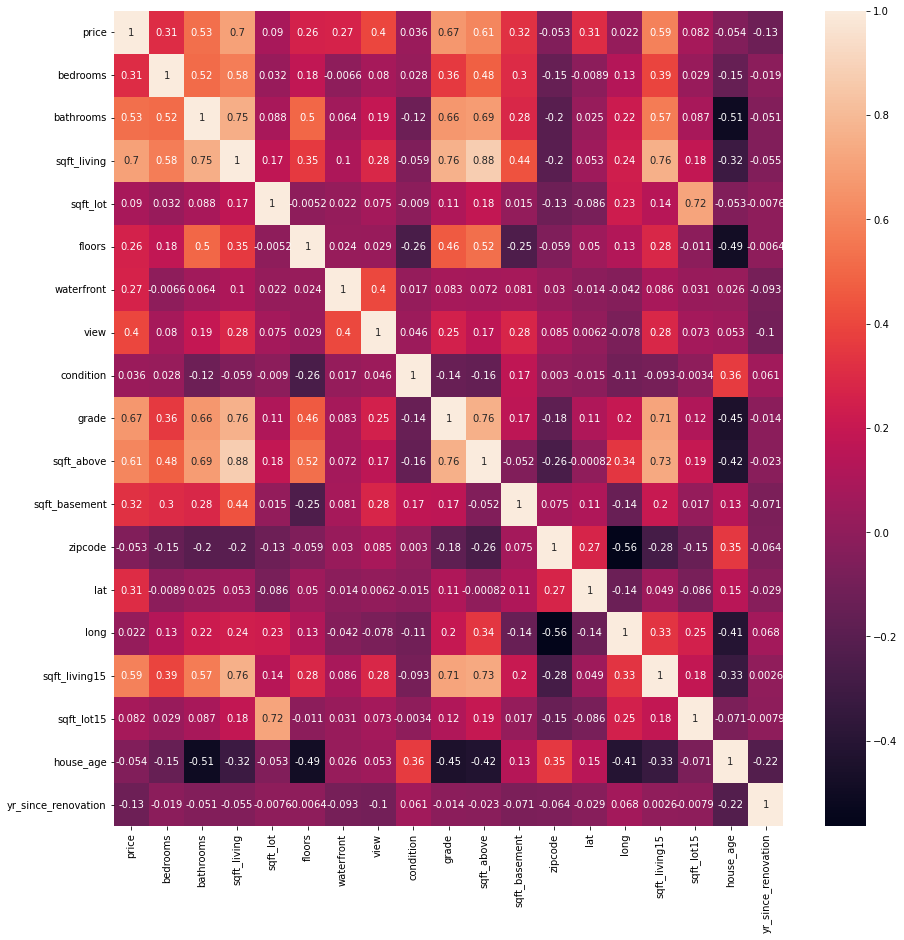

In [11]:
# Create Heatmap to show correlations.

mpl.rcParams['figure.figsize'] = (15,15)

Var_Corr = data.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()


#### Conclusion:  The variables which have high correlation with price includes Bathroom, Sqft_living, Grade, Sqft_above, Sqft_living15. 

                        price
sqft_living          0.702035
grade                0.667434
sqft_above           0.605567
sqft_living15        0.585379
bathrooms            0.525138
view                 0.397293
sqft_basement        0.323816
bedrooms             0.308350
lat                  0.307003
waterfront           0.266369
floors               0.256794
sqft_lot             0.089661
sqft_lot15           0.082447
condition            0.036362
long                 0.021626
zipcode             -0.053203
house_age           -0.053951
yr_since_renovation -0.126426


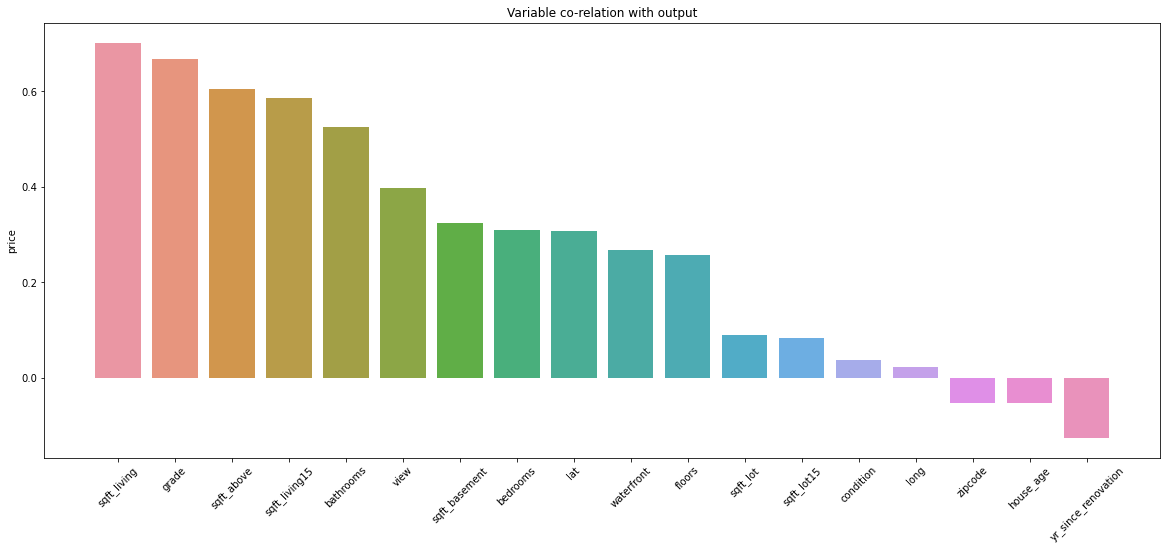

In [12]:
# Create a Barplot of Correlated Features

row = Var_Corr.loc[:,['price']]
row = row.sort_values(by='price', ascending=False).drop('price')

plt.figure(figsize=(20,8))

print(row)


sns.barplot(data=row, x = row.index, y = 'price')
plt.xticks(rotation='45')
plt.title('Variable co-relation with output')
plt.plot()

highly_corr_cols = row[(row.price <= -0.2) | (row.price >= 0.2)].index

#### Conclusion:  Variables which have highest correlation with price by order are 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms','view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors'. These 11 variable contribute most to the house price. Other variables do not have high correlations with Price, which do not have significant impacts on selling price. 

### <font color='red'>Insights: 
Based on the heatmap and Barplot of Correlated Features, the variables 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors' are the main variable that need to add to the regression model   </font>

### Step 8: Visualize the detailed correlations for the variables which highly correlated to the price. 

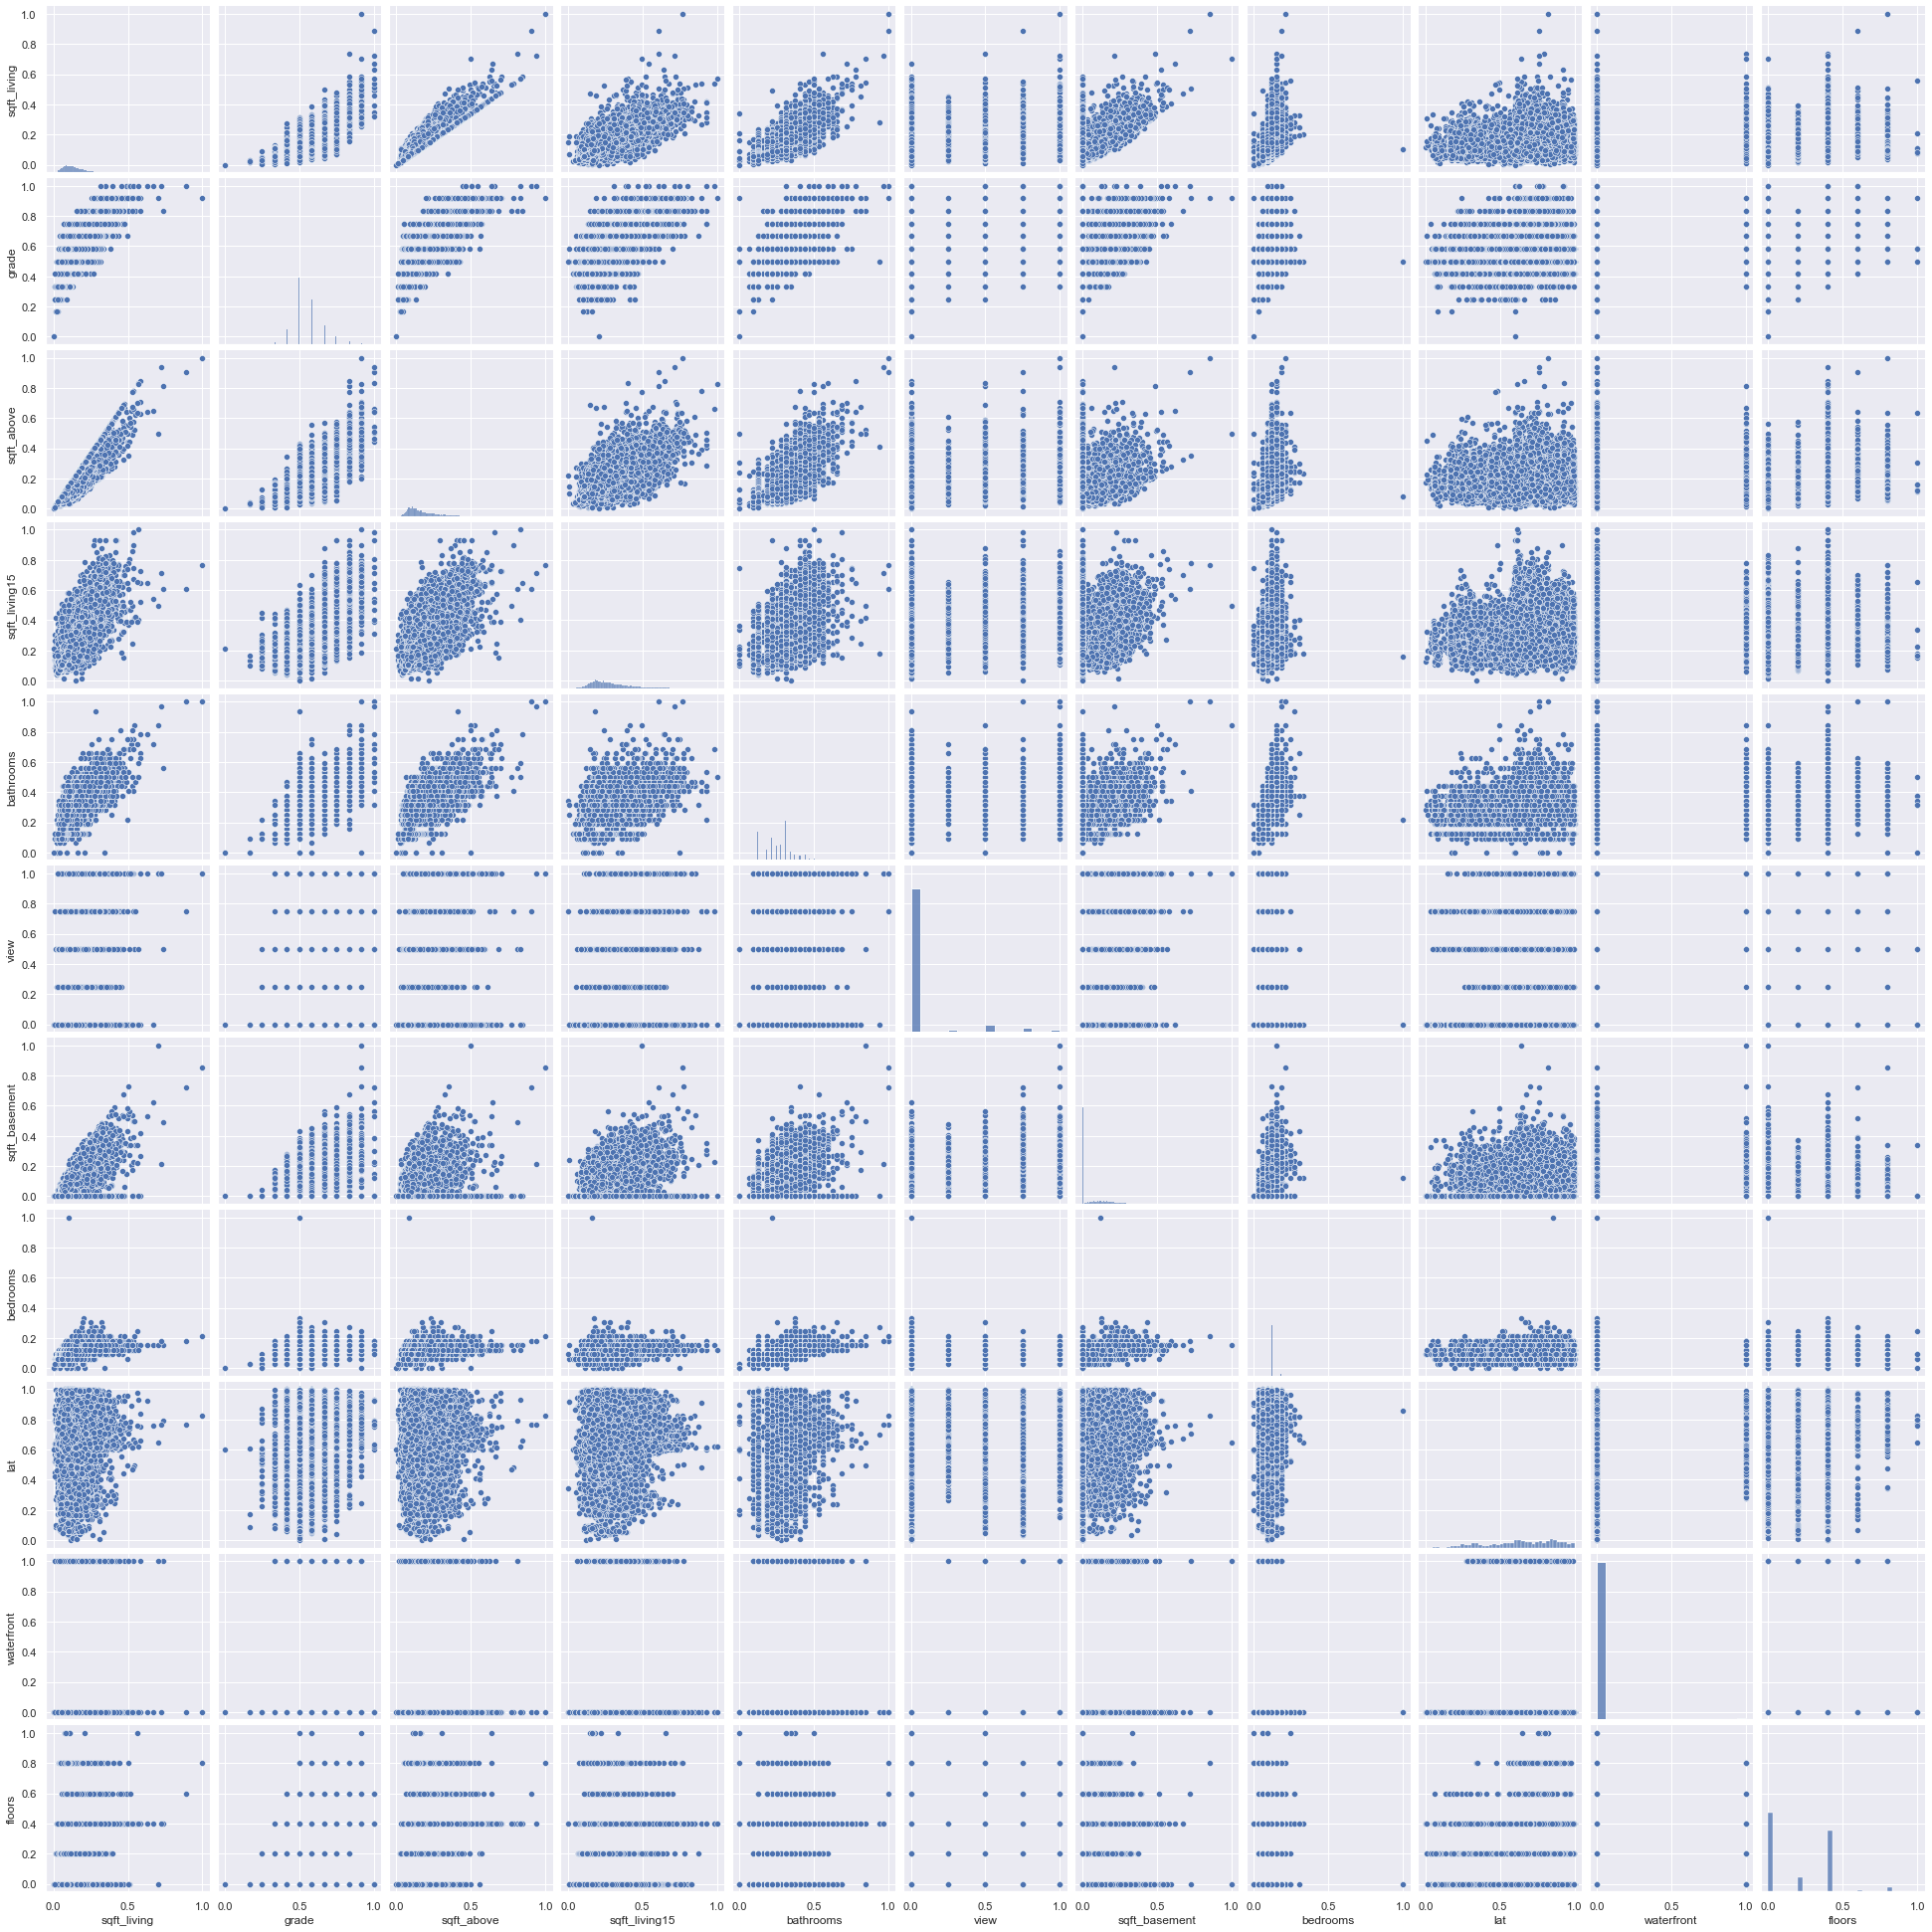

In [13]:
# Based on the heatmap and barplot, we found out the variables 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors' have correlation with Price.

sns.set()
sns.pairplot(data[highly_corr_cols], height=2.5)
plt.show()


#### Conclusion:  The above variables are the main variables that need to be include in the regression model.

In [32]:
p = pd.DataFrame(highly_corr_cols, columns=['Corelated Field Names'])
p

,Corelated Field Names
0,sqft_living
1,grade
2,sqft_above
3,sqft_living15
4,bathrooms
5,view
6,sqft_basement
7,bedrooms
8,lat
9,waterfront


# Part 3: Modelling and Training

### Step 8: Feature Selection

In [15]:
y = data['price']
X = data[highly_corr_cols]

### Step 9: Splitting Training & Test Data

In [16]:
from sklearn.model_selection import train_test_split
# splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Step 10: Use XGBoost Model

In [17]:
# Model 1 : Use XGBoost Regression
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# fit model on training data
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xg_reg = xgb.XGBRegressor(n_estimators = 10)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R2: %f" % (r2))
print("RMSE: %f" % (rmse))

R2: 0.755879
RMSE: 0.024351


/opt/homebrew/Caskroom/miniforge/base/envs/dev_env/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/dev_env/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### XGBoost Model Prediction vs Actual Visualization

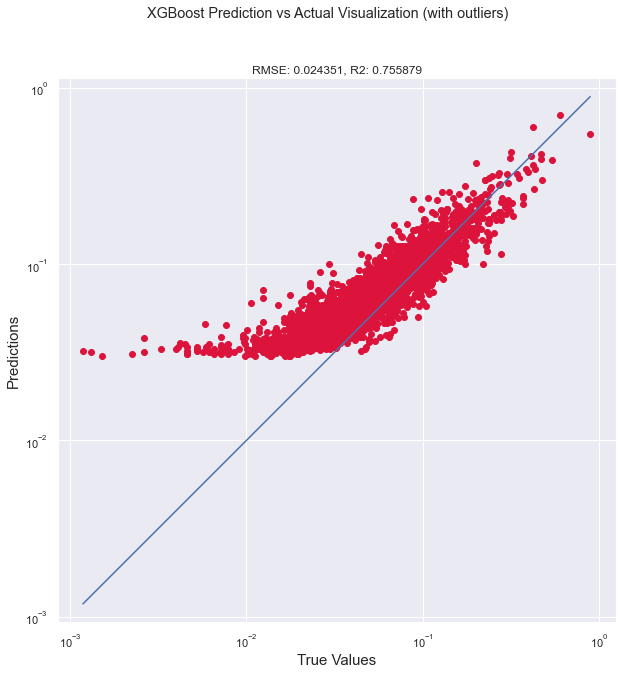

In [18]:
y_test_viz = y_test.to_numpy()
plt.figure(figsize=(10,10))
plt.scatter(y_test_viz, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test_viz))
p2 = min(min(y_pred), min(y_test_viz))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('XGBoost Prediction vs Actual Visualization (with outliers)')
plt.title("RMSE: %f, R2: %f" % (rmse, r2))
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

### Step 11: Use OLS Regression 

In [19]:
# Model 1 : Use OLS Regression including all the variables with outliers but exclude ID and Date.

import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train) 
X_test_1 = sm.add_constant(X_test) 

# Note the difference in argument order
model = sm.OLS(y_train, X_train_1).fit()
predictions = model.predict(X_test_1) # make the predictions by the model

In [20]:
rmse = np.sqrt(MSE(y_test, predictions))
r2 = r2_score(y_test, y_pred)
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

RMSE: 0.028180
R2: 0.755879


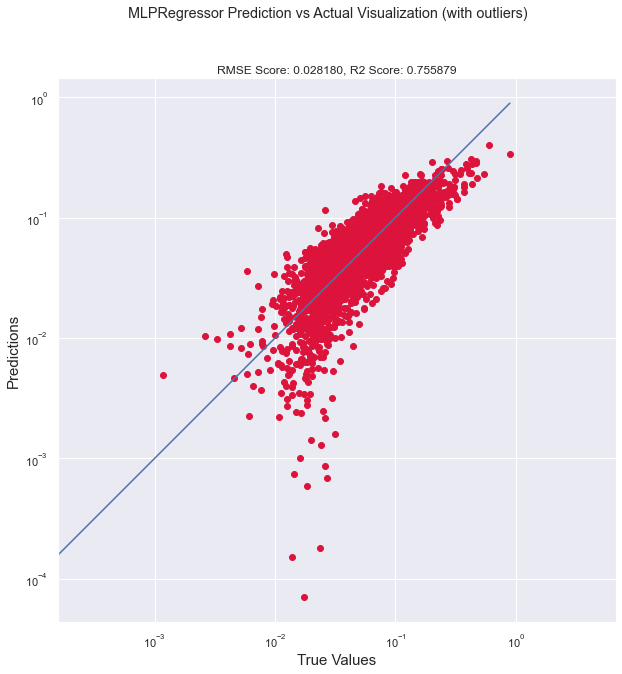

In [21]:
y_test_viz = y_test.to_numpy()
plt.figure(figsize=(10,10))
plt.scatter(y_test_viz, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test_viz))
p2 = min(min(predictions), min(y_test_viz))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('MLPRegressor Prediction vs Actual Visualization (with outliers)')
plt.title("RMSE Score: %f, R2 Score: %f" % (rmse, r2))
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

### Step 12: MLPRegressor Model

In [22]:
# use MLPRegressor on data with outliers.
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("MLPRegressor Score: %f" % (regr.score(X_test, y_test)))
rmse = np.sqrt(MSE(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

MLPRegressor Score: 0.773863
RMSE: 0.023437
R2: 0.773863


#### MLPRegressor Prediction vs Actual Visualization

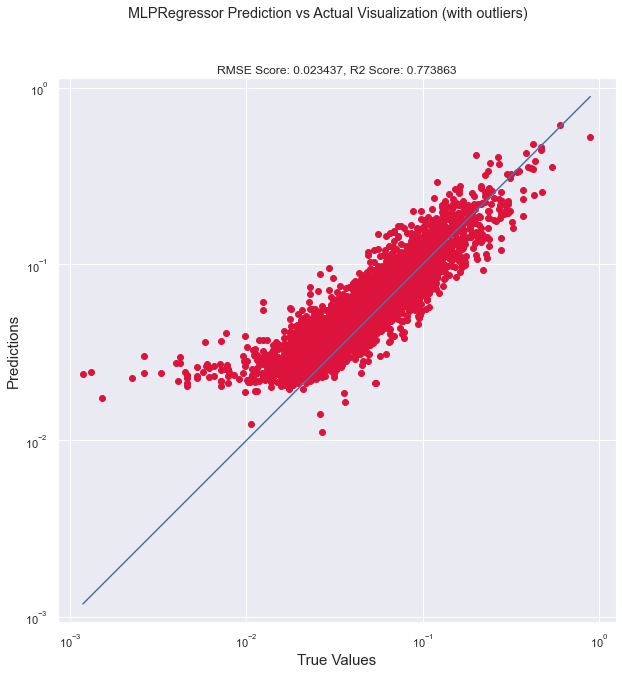

In [23]:
y_test_viz = y_test.to_numpy()
plt.figure(figsize=(10,10))
plt.scatter(y_test_viz, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test_viz))
p2 = min(min(y_pred), min(y_test_viz))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('MLPRegressor Prediction vs Actual Visualization (with outliers)')
plt.title("RMSE Score: %f, R2 Score: %f" % (rmse, r2))
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

### Step 13: Random Forest Regressor

In [24]:
# Use RandomForestRegressor with outliers.
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))


RMSE: 0.019680
R2: 0.840555


#### RandomForestRegressor Prediction vs Actual Visualization

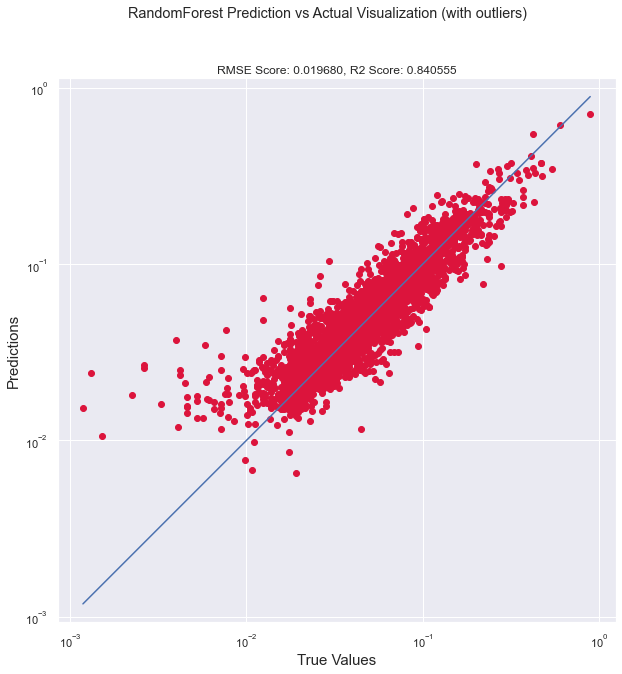

In [25]:
# Use RandomForestRegressor with outliers.
y_test_viz = y_test.to_numpy()
plt.figure(figsize=(10,10))
plt.scatter(y_test_viz, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test_viz))
p2 = min(min(y_pred), min(y_test_viz))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('RandomForest Prediction vs Actual Visualization (with outliers)')
plt.title("RMSE Score: %f, R2 Score: %f" % (rmse, r2))
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

### Step 13: Catboost Regressor

In [26]:
from catboost import CatBoostRegressor

# Use CatboostRegressor with outliers.
# create regressor object
regressor = CatBoostRegressor(verbose=0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))





RMSE: 0.019281
R2: 0.846954


#### CatboostRegressor Prediction vs Actual Visualization

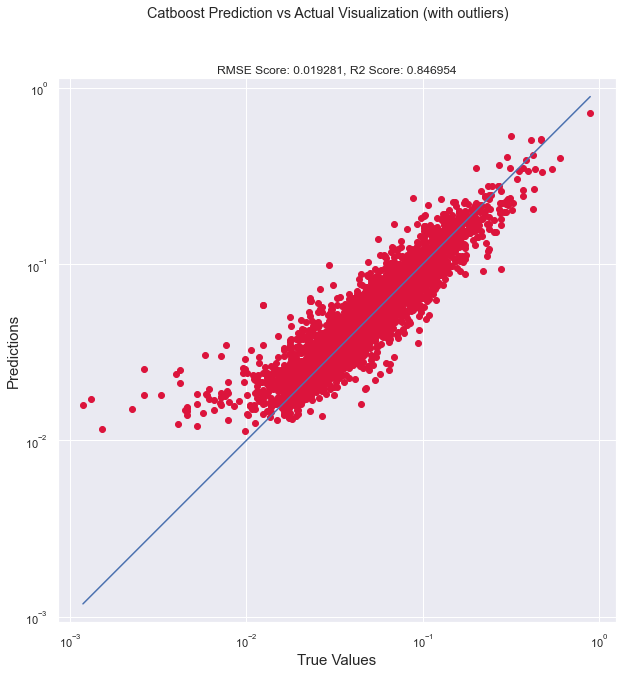

In [27]:
# Use CatboostRegressor with outliers.
y_test_viz = y_test.to_numpy()
plt.figure(figsize=(10,10))
plt.scatter(y_test_viz, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test_viz))
p2 = min(min(y_pred), min(y_test_viz))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('Catboost Prediction vs Actual Visualization (with outliers)')
plt.title("RMSE Score: %f, R2 Score: %f" % (rmse, r2))
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

### Step 13: LightGBM Regressor

In [28]:
from lightgbm import LGBMRegressor

# Use CatboostRegressor with outliers.
# create regressor object
regressor = LGBMRegressor(verbose=0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)
rmse = np.sqrt(MSE(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))





[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
RMSE: 0.020509
R2: 0.826824


#### LightGBMRegressor Prediction vs Actual Visualization

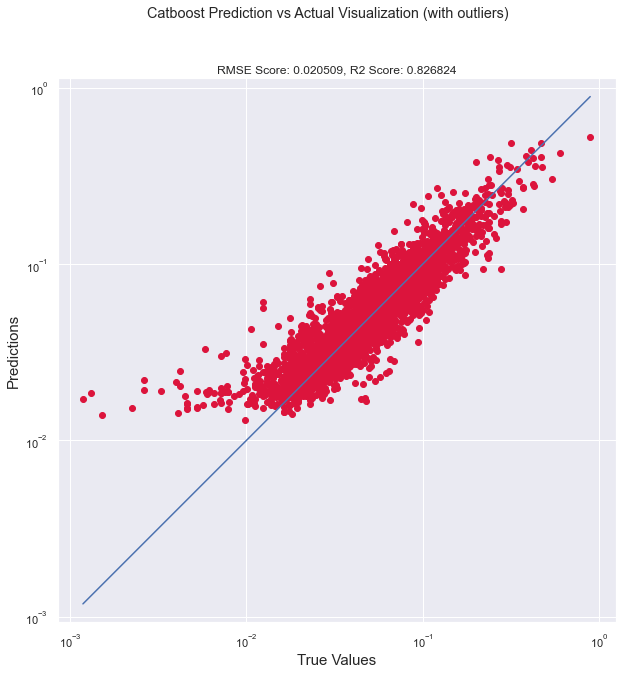

In [29]:
# Use CatboostRegressor with outliers.
y_test_viz = y_test.to_numpy()
plt.figure(figsize=(10,10))
plt.scatter(y_test_viz, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test_viz))
p2 = min(min(y_pred), min(y_test_viz))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.suptitle('Catboost Prediction vs Actual Visualization (with outliers)')
plt.title("RMSE Score: %f, R2 Score: %f" % (rmse, r2))
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()